## 7. Modeling - Home Audio
### 1. Linear Model

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.float_format', '{:0.3f}'.format)

In [2]:
###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
ha_week = pd.read_csv('ha_week.csv', index_col = 0)
ha_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_payment_type,online_order_perc,...,lag_3_NPS,lag_1_Stock_Index,lag_2_Stock_Index,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday
0,1,83742.000,2392.629,4369.057,0.397,2.943,3.486,19,34,97.143,...,54.600,1177.000,1177.000,1177.000,0.000,0.286,0.000,0.000,0.143,0.000
1,2,3725167.133,1845.875,2971.504,0.326,7.454,2.751,202,464,23.062,...,56.139,1177.000,1177.000,1185.286,0.286,0.000,0.000,0.143,0.000,0.143
2,3,4344419.000,1855.961,3121.880,0.339,7.116,2.666,227,527,22.570,...,48.791,1177.000,1185.286,1116.000,0.000,0.000,0.000,0.000,0.143,0.143
3,4,3917329.000,1798.505,3008.836,0.328,7.168,2.762,227,450,20.766,...,46.925,1185.286,1116.000,1101.000,0.000,0.000,0.000,0.143,0.143,0.000
4,5,2812144.000,1853.243,3094.751,0.328,7.297,2.663,200,327,21.613,...,46.925,1116.000,1101.000,1101.000,0.000,0.000,0.000,0.143,0.000,0.143


In [4]:
ha_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA4_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [5]:
home_lm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']]
                            
    
home_lm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA2_listed_price,MA4_listed_price
0,83742.000,0.397,2.943,3.486,34,97.143,0.054,1.854,0.000,0.332,...,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000
1,3725167.133,0.326,7.454,2.751,464,23.062,0.081,2.780,0.000,0.498,...,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.041,-0.129,-0.129
2,4344419.000,0.339,7.116,2.666,527,22.570,0.081,2.780,0.000,0.498,...,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.041,0.003,-0.086
3,3917329.000,0.328,7.168,2.762,450,20.766,0.081,2.780,0.000,0.498,...,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.041,-0.016,-0.089
4,2812144.000,0.328,7.297,2.663,327,21.613,0.028,1.139,0.000,0.192,...,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.041,0.015,0.008


In [6]:
### Checking NaN

home_lm.isnull().sum()

gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
order_payment_type          0
online_order_perc           0
TV_ads                     18
Sponsorship_ads            18
Content_marketing_ads      18
Online_marketing_ads       18
NPS                         0
Stock_Index                 0
Special_sales               0
Payday                      0
heat_deg_days               0
cool_deg_days               0
total_rain_mm               0
total_snow_cm               0
snow_on_grnd_cm             0
MA2_listed_price            0
MA4_listed_price            0
dtype: int64

In [7]:
home_lm.fillna(0, inplace = True)

In [8]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']
                                      

### Scale these variables using 'fit_transform'
home_lm[varlist] = scaler.fit_transform(home_lm[varlist])

In [9]:
home_lm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA2_listed_price,MA4_listed_price
0,0.000,0.586,0.000,1.000,0.000,0.992,0.023,0.058,0.000,0.036,...,0.714,0.000,1.000,0.000,0.247,0.000,0.000,0.000,0.664,0.560
1,0.262,0.138,1.000,0.480,0.247,0.114,0.035,0.088,0.000,0.054,...,0.714,0.000,0.000,0.069,0.393,0.420,0.019,0.009,0.000,0.000
2,0.306,0.223,0.925,0.419,0.283,0.108,0.035,0.088,0.000,0.054,...,0.714,0.286,0.714,0.051,0.799,0.159,0.019,0.009,0.678,0.185
3,0.275,0.150,0.937,0.487,0.239,0.086,0.035,0.088,0.000,0.054,...,0.714,0.000,0.000,0.109,0.706,0.115,0.019,0.009,0.583,0.176
4,0.196,0.151,0.965,0.417,0.168,0.096,0.012,0.036,0.000,0.021,...,0.750,0.000,0.714,0.051,1.000,0.439,0.019,0.009,0.741,0.595


In [10]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = home_lm.drop('gmv',axis=1)
y = home_lm['gmv']

home_train_lm = home_lm

In [11]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (49, 20)
y dataset:  (49,)


In [12]:
###  Instantiate
lm = LinearRegression()

###  Fit a line
lm.fit(x,y)

LinearRegression()

In [13]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

,0,Coefficient
0,discount,0.169
1,sla,-0.059
2,product_procurement_sla,0.022
3,order_payment_type,0.592
4,online_order_perc,-0.431
5,TV_ads,0.087
6,Sponsorship_ads,-0.048
7,Content_marketing_ads,0.068
8,Online_marketing_ads,-0.006
9,NPS,0.164


In [14]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'MA4_listed_price'],
      dtype='object')

### Model Building - Stepwise selection for feature selection

In [15]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [16]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [17]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop total_rain_mm                  with p-value 0.981302
Drop Online_marketing_ads           with p-value 0.969995
Drop product_procurement_sla        with p-value 0.818474
Drop MA4_listed_price               with p-value 0.582767
Drop Payday                         with p-value 0.596935
Drop snow_on_grnd_cm                with p-value 0.512836
Drop Sponsorship_ads                with p-value 0.371384
Drop TV_ads                         with p-value 0.433901
Drop Stock_Index                    with p-value 0.481495
Drop sla                            with p-value 0.474669
Drop total_snow_cm                  with p-value 0.347002
Drop cool_deg_days                  with p-value 0.229312
Drop heat_deg_days                  with p-value 0.480939

 final_selected_features: ['discount', 'order_payment_type', 'online_order_perc', 'Content_marketing_ads', 'NPS', 'Special_sales', 'MA2_listed_price']


In [18]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

### Fitting the model with selected variables
lm1 = sm.OLS(y, x_rfe1).fit() 

print(lm1.params)

const                   -0.006
discount                 0.243
order_payment_type       0.496
online_order_perc       -0.360
Content_marketing_ads    0.101
NPS                      0.100
Special_sales            0.073
MA2_listed_price         0.098
dtype: float64


In [19]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     65.45
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           3.20e-20
Time:                        19:06:49   Log-Likelihood:                 85.355
No. Observations:                  49   AIC:                            -154.7
Df Residuals:                      41   BIC:                            -139.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [20]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,25.940
5,NPS,2.060
3,online_order_perc,1.830
4,Content_marketing_ads,1.690
2,order_payment_type,1.550
1,discount,1.460
7,MA2_listed_price,1.220
6,Special_sales,1.200


In [21]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'order_payment_type',
 'online_order_perc',
 'Content_marketing_ads',
 'NPS',
 'Special_sales',
 'MA2_listed_price']

In [22]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = lm1.predict(sm.add_constant(x_2))

In [23]:
###  Mean square error (MSE)

mse = np.mean((y_pred - y)**2)
mse

0.0017968154273561314

In [24]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

,0,Coefficient
0,const,0.169
1,discount,-0.059
2,order_payment_type,0.022
3,online_order_perc,0.592
4,Content_marketing_ads,-0.431
5,NPS,0.087
6,Special_sales,-0.048
7,MA2_listed_price,0.068


In [25]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(lm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00047894 0.00106262 0.01829082 0.00244982 0.00127894 0.0035863
 0.00212837 0.00149613 0.003062   0.00368557] 

Mean of 5 KFold CV - MSE: 0.0037519515764750434


In [26]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#    features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

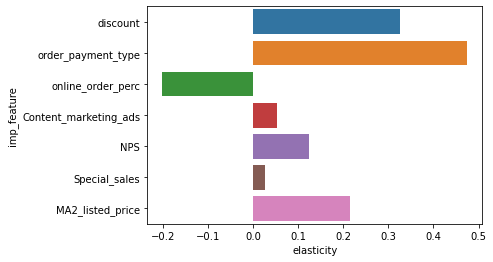

,imp_feature,coef,elasticity
0,discount,0.243,0.326
1,order_payment_type,0.496,0.474
2,online_order_perc,-0.360,-0.201
3,Content_marketing_ads,0.101,0.054
4,NPS,0.100,0.125
5,Special_sales,0.073,0.027
6,MA2_listed_price,0.098,0.215


In [27]:
elasticity(lm1,home_train_lm)

Text(0, 0.5, 'y_pred')

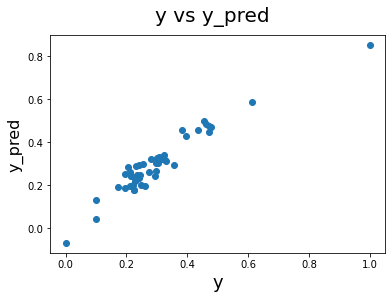

In [28]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

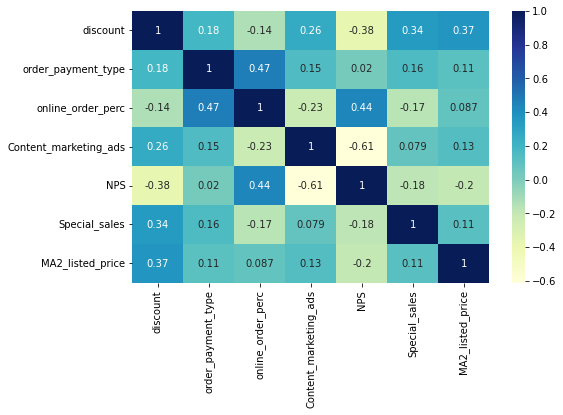

In [29]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_lm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Multiplicative Model

In [30]:
ha_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA4_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [31]:
home_mm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']]         

home_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA2_listed_price,MA4_listed_price
0,83742.000,0.397,2.943,3.486,34,97.143,0.054,1.854,0.000,0.332,...,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000
1,3725167.133,0.326,7.454,2.751,464,23.062,0.081,2.780,0.000,0.498,...,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.041,-0.129,-0.129
2,4344419.000,0.339,7.116,2.666,527,22.570,0.081,2.780,0.000,0.498,...,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.041,0.003,-0.086
3,3917329.000,0.328,7.168,2.762,450,20.766,0.081,2.780,0.000,0.498,...,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.041,-0.016,-0.089
4,2812144.000,0.328,7.297,2.663,327,21.613,0.028,1.139,0.000,0.192,...,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.041,0.015,0.008


In [32]:
### Applying Log 
home_mm=np.log(home_mm)

home_mm = home_mm.fillna(0)
home_mm = home_mm.replace([np.inf, -np.inf], 0)

In [33]:
home_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA2_listed_price,MA4_listed_price
0,11.335,-0.923,1.079,1.249,3.526,4.576,-2.922,0.617,-8.364,-1.103,...,7.071,0.000,-1.609,-2.303,0.378,0.000,0.000,0.000,0.000,0.000
1,15.131,-1.121,2.009,1.012,6.140,3.138,-2.516,1.023,-7.958,-0.698,...,7.071,0.000,0.000,0.057,0.842,1.424,-3.532,-3.189,0.000,0.000
2,15.284,-1.081,1.962,0.981,6.267,3.117,-2.516,1.023,-7.958,-0.698,...,7.071,-1.253,-1.946,-0.203,1.552,0.451,-3.532,-3.189,-5.905,0.000
3,15.181,-1.115,1.970,1.016,6.109,3.033,-2.516,1.023,-7.958,-0.698,...,7.071,0.000,0.000,0.490,1.428,0.131,-3.532,-3.189,0.000,0.000
4,14.849,-1.114,1.987,0.979,5.790,3.073,-3.568,0.131,-9.046,-1.652,...,7.078,0.000,-1.946,-0.203,1.776,1.468,-3.532,-3.189,-4.200,-4.819


In [34]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']      



### Scale these variables using 'fit_transform'
home_mm[varlist] = scaler.fit_transform(home_mm[varlist])

In [35]:
home_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA2_listed_price,MA4_listed_price
0,0.000,0.635,0.000,1.000,0.000,0.997,0.147,0.178,0.073,0.142,...,0.734,1.000,0.173,0.000,0.408,0.303,0.895,0.677,1.000,1.000
1,0.741,0.166,1.000,0.544,0.661,0.271,0.239,0.296,0.117,0.247,...,0.734,1.000,1.000,0.477,0.604,0.736,0.000,0.000,1.000,1.000
2,0.771,0.262,0.950,0.484,0.693,0.260,0.239,0.296,0.117,0.247,...,0.734,0.356,0.000,0.424,0.905,0.440,0.000,0.000,0.144,1.000
3,0.751,0.179,0.958,0.552,0.653,0.218,0.239,0.296,0.117,0.247,...,0.734,1.000,1.000,0.564,0.853,0.343,0.000,0.000,1.000,1.000
4,0.686,0.181,0.977,0.481,0.572,0.238,0.000,0.038,0.000,0.000,...,0.768,1.000,0.000,0.424,1.000,0.750,0.000,0.000,0.391,0.304


In [36]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split

x = home_mm.drop('gmv',axis=1)
y = home_mm['gmv']

home_train_mm = home_mm

In [37]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(49, 20) (49,)


In [38]:
### Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression()

In [39]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

,0,Coefficient
0,discount,0.008
1,sla,-0.067
2,product_procurement_sla,0.005
3,order_payment_type,0.801
4,online_order_perc,-0.391
5,TV_ads,0.055
6,Sponsorship_ads,-0.005
7,Content_marketing_ads,-0.042
8,Online_marketing_ads,0.003
9,NPS,0.020


In [40]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'MA4_listed_price'],
      dtype='object')

### Model Building - Stepwise selection for feature selection

In [41]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [42]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [43]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop MA2_listed_price               with p-value 0.918006
Drop Online_marketing_ads           with p-value 0.890361
Drop product_procurement_sla        with p-value 0.763276
Drop Payday                         with p-value 0.631368
Drop total_snow_cm                  with p-value 0.553868
Drop total_rain_mm                  with p-value 0.546175
Drop discount                       with p-value 0.427309
Drop Sponsorship_ads                with p-value 0.549355
Drop heat_deg_days                  with p-value 0.399977
Drop snow_on_grnd_cm                with p-value 0.482027
Drop Special_sales                  with p-value 0.391017
Drop MA4_listed_price               with p-value 0.237156
Drop NPS                            with p-value 0.24118
Drop Stock_Index                    with p-value 0.242787

 final_selected_features: ['sla', 'order_payment_type', 'online_order_perc', 'TV_ads', 'Content_marketing_ads', 'cool_deg_days']


In [44]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                    0.386
sla                     -0.083
order_payment_type       0.804
online_order_perc       -0.389
TV_ads                   0.026
Content_marketing_ads   -0.040
cool_deg_days            0.010
dtype: float64


In [45]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2244.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           5.61e-51
Time:                        19:06:51   Log-Likelihood:                 171.69
No. Observations:                  49   AIC:                            -329.4
Df Residuals:                      42   BIC:                            -316.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.38

In [46]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.840
4,TV_ads,6.320
5,Content_marketing_ads,5.810
2,order_payment_type,2.270
1,sla,2.090
3,online_order_perc,1.720
6,cool_deg_days,1.430


In [47]:
features = list(x_rfe1.columns)
features.remove('const')
features

['sla',
 'order_payment_type',
 'online_order_perc',
 'TV_ads',
 'Content_marketing_ads',
 'cool_deg_days']

In [48]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = mm1.predict(sm.add_constant(x_2))

In [49]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

5.29785783812863e-05

In [50]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

,0,Coefficient
0,const,0.008
1,sla,-0.067
2,order_payment_type,0.005
3,online_order_perc,0.801
4,TV_ads,-0.391
5,Content_marketing_ads,0.055
6,cool_deg_days,-0.005


In [51]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [1.33724089e-04 1.88365600e-05 4.03566124e-05 3.53600833e-05
 3.91526268e-05 7.84057578e-05 4.42926232e-05 6.04382417e-05
 7.69814809e-05 2.35297372e-04] 

Mean of 5 KFold CV - MSE: 7.628454475719037e-05


In [52]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#     features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

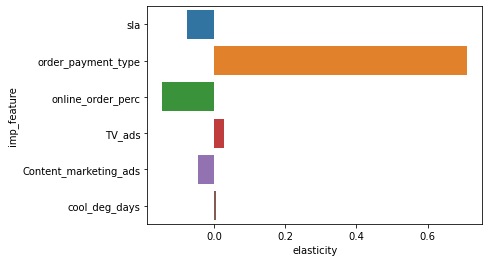

,imp_feature,coef,elasticity
0,sla,-0.083,-0.077
1,order_payment_type,0.804,0.710
2,online_order_perc,-0.389,-0.145
3,TV_ads,0.026,0.028
4,Content_marketing_ads,-0.040,-0.044
5,cool_deg_days,0.010,0.006


In [53]:
elasticity(mm1,home_train_mm)

Text(0, 0.5, 'y_pred')

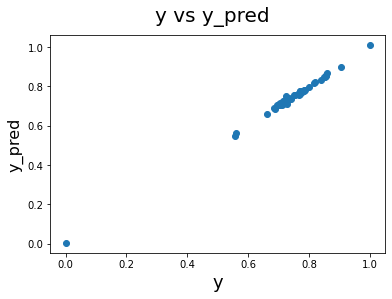

In [54]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

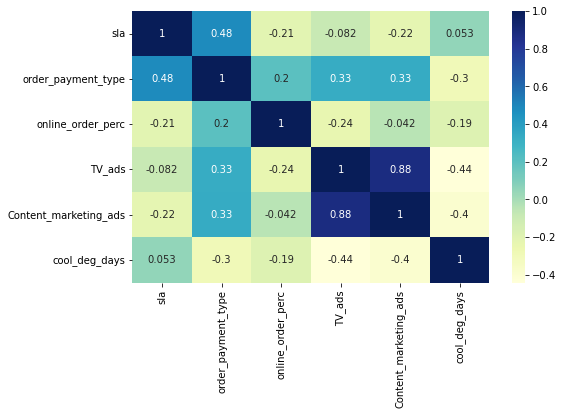

In [55]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_mm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Kyock Model

In [56]:
ha_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA4_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [57]:
home_km = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']]           


home_km.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA2_listed_price,MA4_listed_price
0,83742.000,0.397,2.943,3.486,34,97.143,0.054,1.854,0.000,0.332,...,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000
1,3725167.133,0.326,7.454,2.751,464,23.062,0.081,2.780,0.000,0.498,...,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.041,-0.129,-0.129
2,4344419.000,0.339,7.116,2.666,527,22.570,0.081,2.780,0.000,0.498,...,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.041,0.003,-0.086
3,3917329.000,0.328,7.168,2.762,450,20.766,0.081,2.780,0.000,0.498,...,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.041,-0.016,-0.089
4,2812144.000,0.328,7.297,2.663,327,21.613,0.028,1.139,0.000,0.192,...,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.041,0.015,0.008


In [58]:
home_km['lag_1_gmv'] = home_km['gmv'].shift(-1)

In [59]:
### Checking NaN

home_km.isnull().sum()

gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
order_payment_type          0
online_order_perc           0
TV_ads                     18
Sponsorship_ads            18
Content_marketing_ads      18
Online_marketing_ads       18
NPS                         0
Stock_Index                 0
Special_sales               0
Payday                      0
heat_deg_days               0
cool_deg_days               0
total_rain_mm               0
total_snow_cm               0
snow_on_grnd_cm             0
MA2_listed_price            0
MA4_listed_price            0
lag_1_gmv                   1
dtype: int64

In [60]:
home_km = home_km.fillna(0)

In [61]:
home_km.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA2_listed_price,MA4_listed_price,lag_1_gmv
0,83742.000,0.397,2.943,3.486,34,97.143,0.054,1.854,0.000,0.332,...,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000,3725167.133
1,3725167.133,0.326,7.454,2.751,464,23.062,0.081,2.780,0.000,0.498,...,0.000,0.000,1.059,2.322,4.155,0.029,0.041,-0.129,-0.129,4344419.000
2,4344419.000,0.339,7.116,2.666,527,22.570,0.081,2.780,0.000,0.498,...,0.286,0.143,0.816,4.722,1.569,0.029,0.041,0.003,-0.086,3917329.000
3,3917329.000,0.328,7.168,2.762,450,20.766,0.081,2.780,0.000,0.498,...,0.000,0.000,1.632,4.172,1.141,0.029,0.041,-0.016,-0.089,2812144.000
4,2812144.000,0.328,7.297,2.663,327,21.613,0.028,1.139,0.000,0.192,...,0.000,0.143,0.816,5.908,4.341,0.029,0.041,0.015,0.008,3091251.000


In [62]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_gmv']

### Scale these variables using 'fit_transform'
home_km[varlist] = scaler.fit_transform(home_km[varlist])

In [63]:
home_km.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA2_listed_price,MA4_listed_price,lag_1_gmv
0,0.000,0.586,0.000,1.000,0.000,0.992,0.023,0.058,0.000,0.036,...,0.000,1.000,0.000,0.247,0.000,0.000,0.000,0.664,0.560,0.266
1,0.262,0.138,1.000,0.480,0.247,0.114,0.035,0.088,0.000,0.054,...,0.000,0.000,0.069,0.393,0.420,0.019,0.009,0.000,0.000,0.310
2,0.306,0.223,0.925,0.419,0.283,0.108,0.035,0.088,0.000,0.054,...,0.286,0.714,0.051,0.799,0.159,0.019,0.009,0.678,0.185,0.280
3,0.275,0.150,0.937,0.487,0.239,0.086,0.035,0.088,0.000,0.054,...,0.000,0.000,0.109,0.706,0.115,0.019,0.009,0.583,0.176,0.201
4,0.196,0.151,0.965,0.417,0.168,0.096,0.012,0.036,0.000,0.021,...,0.000,0.714,0.051,1.000,0.439,0.019,0.009,0.741,0.595,0.221


In [64]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = home_km.drop('gmv',axis=1)
y = home_km['gmv']

home_train_km = home_km

In [65]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(49, 21) (49,)


In [66]:
###  Instantiate
km = LinearRegression()

###  Fit a line
km.fit(x,y)

LinearRegression()

In [67]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

,0,Coefficient
0,discount,0.171
1,sla,-0.054
2,product_procurement_sla,0.025
3,order_payment_type,0.584
4,online_order_perc,-0.429
5,TV_ads,0.090
6,Sponsorship_ads,-0.051
7,Content_marketing_ads,0.079
8,Online_marketing_ads,-0.007
9,NPS,0.162


In [68]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'MA4_listed_price', 'lag_1_gmv'],
      dtype='object')

### Model Building - Stepwise selection for feature selection

In [69]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [70]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price', 'lag_1_gmv'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ### forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [71]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop total_rain_mm                  with p-value 0.9851
Drop Online_marketing_ads           with p-value 0.966962
Drop product_procurement_sla        with p-value 0.792524
Drop lag_1_gmv                      with p-value 0.712322
Drop MA4_listed_price               with p-value 0.582767
Drop Payday                         with p-value 0.596935
Drop snow_on_grnd_cm                with p-value 0.512836
Drop Sponsorship_ads                with p-value 0.371384
Drop TV_ads                         with p-value 0.433901
Drop Stock_Index                    with p-value 0.481495
Drop sla                            with p-value 0.474669
Drop total_snow_cm                  with p-value 0.347002
Drop cool_deg_days                  with p-value 0.229312
Drop heat_deg_days                  with p-value 0.480939

 final_selected_features: ['discount', 'order_payment_type', 'online_order_perc', 'Content_marketing_ads', 'NPS', 'Special_sales', 'MA2_listed_price']


In [72]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

### Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 

print(km1.params)

const                   -0.006
discount                 0.243
order_payment_type       0.496
online_order_perc       -0.360
Content_marketing_ads    0.101
NPS                      0.100
Special_sales            0.073
MA2_listed_price         0.098
dtype: float64


In [73]:
print(km1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     65.45
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           3.20e-20
Time:                        19:06:52   Log-Likelihood:                 85.355
No. Observations:                  49   AIC:                            -154.7
Df Residuals:                      41   BIC:                            -139.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [74]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,25.940
5,NPS,2.060
3,online_order_perc,1.830
4,Content_marketing_ads,1.690
2,order_payment_type,1.550
1,discount,1.460
7,MA2_listed_price,1.220
6,Special_sales,1.200


In [75]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'order_payment_type',
 'online_order_perc',
 'Content_marketing_ads',
 'NPS',
 'Special_sales',
 'MA2_listed_price']

In [76]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = km1.predict(sm.add_constant(x_2))

In [77]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0017968154273561314

In [78]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

,0,Coefficient
0,const,0.171
1,discount,-0.054
2,order_payment_type,0.025
3,online_order_perc,0.584
4,Content_marketing_ads,-0.429
5,NPS,0.090
6,Special_sales,-0.051
7,MA2_listed_price,0.079


In [79]:
### Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(km,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00047894 0.00106262 0.01829082 0.00244982 0.00127894 0.0035863
 0.00212837 0.00149613 0.003062   0.00368557] 

Mean of 5 KFold CV - MSE: 0.0037519515764750434


In [80]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

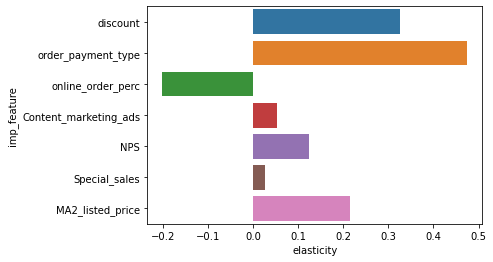

,imp_feature,coef,elasticity
0,discount,0.243,0.326
1,order_payment_type,0.496,0.474
2,online_order_perc,-0.360,-0.201
3,Content_marketing_ads,0.101,0.054
4,NPS,0.100,0.125
5,Special_sales,0.073,0.027
6,MA2_listed_price,0.098,0.215


In [81]:
elasticity(km1,home_train_km)

Text(0, 0.5, 'y_pred')

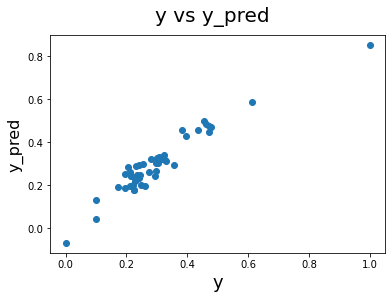

In [82]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

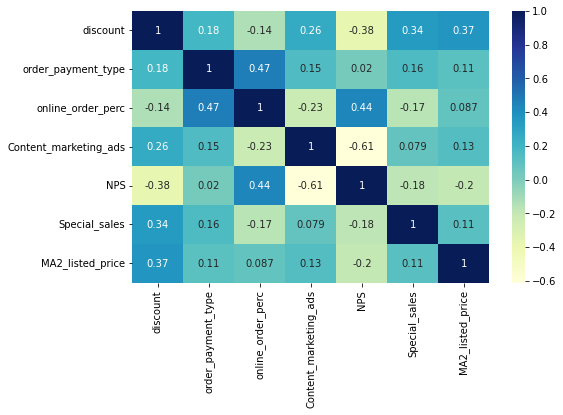

In [83]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_km[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Distributed Lag Model

In [84]:
home_dlm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']]           


home_dlm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,lag_3_NPS,lag_1_Stock_Index,lag_2_Stock_Index,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday
0,83742.000,0.397,2.943,3.486,34,97.143,0.054,1.854,0.000,0.332,...,54.600,1177.000,1177.000,1177.000,0.000,0.286,0.000,0.000,0.143,0.000
1,3725167.133,0.326,7.454,2.751,464,23.062,0.081,2.780,0.000,0.498,...,56.139,1177.000,1177.000,1185.286,0.286,0.000,0.000,0.143,0.000,0.143
2,4344419.000,0.339,7.116,2.666,527,22.570,0.081,2.780,0.000,0.498,...,48.791,1177.000,1185.286,1116.000,0.000,0.000,0.000,0.000,0.143,0.143
3,3917329.000,0.328,7.168,2.762,450,20.766,0.081,2.780,0.000,0.498,...,46.925,1185.286,1116.000,1101.000,0.000,0.000,0.000,0.143,0.143,0.000
4,2812144.000,0.328,7.297,2.663,327,21.613,0.028,1.139,0.000,0.192,...,46.925,1116.000,1101.000,1101.000,0.000,0.000,0.000,0.143,0.000,0.143


In [85]:
home_dlm['lag_1_gmv'] = home_dlm['gmv'].shift(-1)
home_dlm['lag_2_gmv'] = home_dlm['gmv'].shift(-2)
home_dlm['lag_3_gmv'] = home_dlm['gmv'].shift(-3)

In [86]:
### Checking NaN

home_dlm.isnull().sum()

gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
order_payment_type          0
online_order_perc           0
TV_ads                     18
Sponsorship_ads            18
Content_marketing_ads      18
Online_marketing_ads       18
NPS                         0
Stock_Index                 0
Special_sales               0
Payday                      0
heat_deg_days               0
cool_deg_days               0
total_rain_mm               0
total_snow_cm               0
snow_on_grnd_cm             0
MA2_listed_price            0
MA4_listed_price            0
lag_1_listed_price          0
lag_1_discount_offer        0
lag_2_discount_offer        0
lag_3_discount_offer        0
lag_2_NPS                   0
lag_3_NPS                   0
lag_1_Stock_Index           0
lag_2_Stock_Index           0
lag_3_Stock_Index           0
lag_1_Special_sales         0
lag_2_Special_sales         0
lag_3_Special_sales         0
lag_1_Payd

In [87]:
home_dlm = home_dlm.fillna(0)

In [88]:
home_dlm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday,lag_1_gmv,lag_2_gmv,lag_3_gmv
0,83742.000,0.397,2.943,3.486,34,97.143,0.054,1.854,0.000,0.332,...,1177.000,0.000,0.286,0.000,0.000,0.143,0.000,3725167.133,4344419.000,3917329.000
1,3725167.133,0.326,7.454,2.751,464,23.062,0.081,2.780,0.000,0.498,...,1185.286,0.286,0.000,0.000,0.143,0.000,0.143,4344419.000,3917329.000,2812144.000
2,4344419.000,0.339,7.116,2.666,527,22.570,0.081,2.780,0.000,0.498,...,1116.000,0.000,0.000,0.000,0.000,0.143,0.143,3917329.000,2812144.000,3091251.000
3,3917329.000,0.328,7.168,2.762,450,20.766,0.081,2.780,0.000,0.498,...,1101.000,0.000,0.000,0.000,0.143,0.143,0.000,2812144.000,3091251.000,3489765.000
4,2812144.000,0.328,7.297,2.663,327,21.613,0.028,1.139,0.000,0.192,...,1101.000,0.000,0.000,0.000,0.143,0.000,0.143,3091251.000,3489765.000,3091999.000


In [89]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']


###  Scale these variables using 'fit_transform'
home_dlm[varlist] = scaler.fit_transform(home_dlm[varlist])

In [90]:
home_dlm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday,lag_1_gmv,lag_2_gmv,lag_3_gmv
0,0.000,0.586,0.000,1.000,0.000,0.992,0.023,0.058,0.000,0.036,...,0.948,0.000,0.286,0.000,0.000,1.000,0.000,3725167.133,4344419.000,3917329.000
1,0.262,0.138,1.000,0.480,0.247,0.114,0.035,0.088,0.000,0.054,...,0.954,0.286,0.000,0.000,1.000,0.000,1.000,4344419.000,3917329.000,2812144.000
2,0.306,0.223,0.925,0.419,0.283,0.108,0.035,0.088,0.000,0.054,...,0.899,0.000,0.000,0.000,0.000,1.000,1.000,3917329.000,2812144.000,3091251.000
3,0.275,0.150,0.937,0.487,0.239,0.086,0.035,0.088,0.000,0.054,...,0.886,0.000,0.000,0.000,1.000,1.000,0.000,2812144.000,3091251.000,3489765.000
4,0.196,0.151,0.965,0.417,0.168,0.096,0.012,0.036,0.000,0.021,...,0.886,0.000,0.000,0.000,1.000,0.000,1.000,3091251.000,3489765.000,3091999.000


In [91]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = home_dlm.drop('gmv',axis=1)
y = home_dlm['gmv']

home_train_dlm = home_dlm

In [92]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(49, 38) (49,)


In [93]:
###  Instantiate
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)

LinearRegression()

In [94]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

,0,Coefficient
0,discount,0.083
1,sla,-0.271
2,product_procurement_sla,-0.199
3,order_payment_type,0.577
4,online_order_perc,-0.497
5,TV_ads,0.471
6,Sponsorship_ads,-0.100
7,Content_marketing_ads,0.205
8,Online_marketing_ads,-0.214
9,NPS,0.378


In [95]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'MA4_listed_price', 'lag_1_listed_price', 'lag_1_discount_offer',
       'lag_2_discount_offer', 'lag_3_discount_offer', 'lag_2_NPS',
       'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index',
       'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales',
       'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday',
       'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

### Model Building - Stepwise selection for feature selection

In [96]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [97]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [98]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop total_snow_cm                  with p-value 0.993685
Drop lag_1_Special_sales            with p-value 0.978931
Drop lag_1_listed_price             with p-value 0.969904
Drop lag_2_discount_offer           with p-value 0.939075
Drop TV_ads                         with p-value 0.943608
Drop Payday                         with p-value 0.928375
Drop Sponsorship_ads                with p-value 0.879914
Drop lag_1_Payday                   with p-value 0.84203
Drop lag_1_discount_offer           with p-value 0.832221
Drop lag_1_Stock_Index              with p-value 0.842077
Drop product_procurement_sla        with p-value 0.755695
Drop lag_2_NPS                      with p-value 0.669027
Drop total_rain_mm                  with p-value 0.664319
Drop lag_3_Special_sales            with p-value 0.606068
Drop MA4_listed_price               with p-value 0.526097
Drop lag_2_Stock_Index              with p-value 0.523728
Drop lag_3_discount_offer           with p-value 0.507169
Drop Content_ma

In [99]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                   0.088
sla                    -0.181
order_payment_type      0.707
online_order_perc      -0.485
Online_marketing_ads    0.135
NPS                     0.135
heat_deg_days          -0.156
cool_deg_days          -0.133
MA2_listed_price        0.181
lag_3_NPS               0.490
lag_3_Stock_Index      -0.366
dtype: float64


In [100]:
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     42.14
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.74e-17
Time:                        19:06:56   Log-Likelihood:                 85.180
No. Observations:                  49   AIC:                            -148.4
Df Residuals:                      38   BIC:                            -127.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0885 

In [101]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,79.340
10,lag_3_Stock_Index,23.810
9,lag_3_NPS,21.480
5,NPS,3.990
7,cool_deg_days,3.280
3,online_order_perc,2.950
6,heat_deg_days,2.490
1,sla,2.310
4,Online_marketing_ads,2.220
2,order_payment_type,1.870


In [102]:
x_rfe1.drop('sla', axis = 1, inplace = True)

In [103]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     36.65
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           2.66e-16
Time:                        19:06:56   Log-Likelihood:                 79.165
No. Observations:                  49   AIC:                            -138.3
Df Residuals:                      39   BIC:                            -119.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0135 

In [104]:
# x_rfe1.drop('lag_1_discount_offer', axis = 1, inplace = True)

In [105]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     36.65
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           2.66e-16
Time:                        19:06:56   Log-Likelihood:                 79.165
No. Observations:                  49   AIC:                            -138.3
Df Residuals:                      39   BIC:                            -119.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0135 

In [106]:
# x_rfe1.drop('product_procurement_sla', axis = 1, inplace = True)

In [107]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     36.65
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           2.66e-16
Time:                        19:06:56   Log-Likelihood:                 79.165
No. Observations:                  49   AIC:                            -138.3
Df Residuals:                      39   BIC:                            -119.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0135 

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,68.180
9,lag_3_Stock_Index,20.100
8,lag_3_NPS,19.370
4,NPS,3.590
6,cool_deg_days,3.200
5,heat_deg_days,2.490
2,online_order_perc,2.440
3,Online_marketing_ads,2.040
1,order_payment_type,1.620
7,MA2_listed_price,1.180


In [109]:
features = list(x_rfe1.columns)
features.remove('const')
features

['order_payment_type',
 'online_order_perc',
 'Online_marketing_ads',
 'NPS',
 'heat_deg_days',
 'cool_deg_days',
 'MA2_listed_price',
 'lag_3_NPS',
 'lag_3_Stock_Index']

In [110]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [111]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0023132159796030965

In [112]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

,0,Coefficient
0,const,0.083
1,order_payment_type,-0.271
2,online_order_perc,-0.199
3,Online_marketing_ads,0.577
4,NPS,-0.497
5,heat_deg_days,0.471
6,cool_deg_days,-0.100
7,MA2_listed_price,0.205
8,lag_3_NPS,-0.214
9,lag_3_Stock_Index,0.378


In [113]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00109497 0.00044085 0.01607615 0.00281672 0.00038524 0.00163745
 0.00466826 0.00195786 0.0062707  0.00297203] 

Mean of 5 KFold CV - MSE: 0.003832023055153693


In [114]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

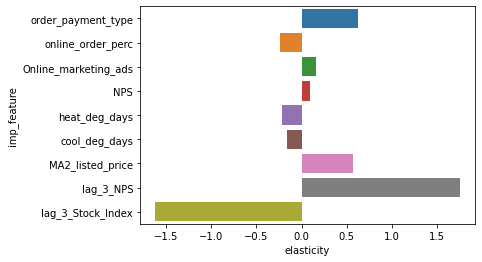

,imp_feature,coef,elasticity
0,order_payment_type,0.650,0.622
1,online_order_perc,-0.423,-0.235
2,Online_marketing_ads,0.111,0.157
3,NPS,0.078,0.098
4,heat_deg_days,-0.157,-0.218
5,cool_deg_days,-0.159,-0.166
6,MA2_listed_price,0.258,0.567
7,lag_3_NPS,0.644,1.747
8,lag_3_Stock_Index,-0.553,-1.615


In [115]:
elasticity(dlm1,home_train_dlm)

Text(0, 0.5, 'y_pred')

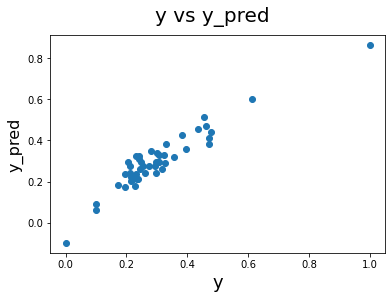

In [116]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

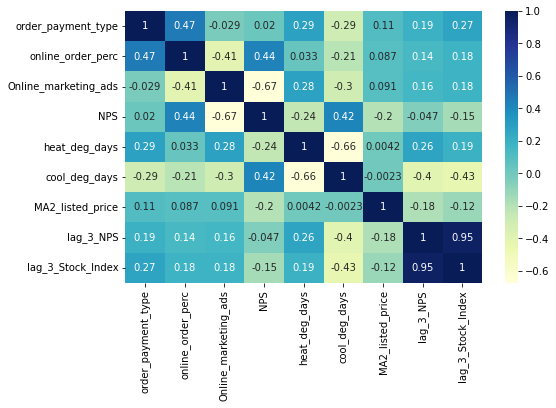

In [117]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Distributed + Multiplicated Model

In [118]:
home_dlmm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']]           


home_dlmm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,lag_3_NPS,lag_1_Stock_Index,lag_2_Stock_Index,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday
0,83742.000,0.397,2.943,3.486,34,97.143,0.054,1.854,0.000,0.332,...,54.600,1177.000,1177.000,1177.000,0.000,0.286,0.000,0.000,0.143,0.000
1,3725167.133,0.326,7.454,2.751,464,23.062,0.081,2.780,0.000,0.498,...,56.139,1177.000,1177.000,1185.286,0.286,0.000,0.000,0.143,0.000,0.143
2,4344419.000,0.339,7.116,2.666,527,22.570,0.081,2.780,0.000,0.498,...,48.791,1177.000,1185.286,1116.000,0.000,0.000,0.000,0.000,0.143,0.143
3,3917329.000,0.328,7.168,2.762,450,20.766,0.081,2.780,0.000,0.498,...,46.925,1185.286,1116.000,1101.000,0.000,0.000,0.000,0.143,0.143,0.000
4,2812144.000,0.328,7.297,2.663,327,21.613,0.028,1.139,0.000,0.192,...,46.925,1116.000,1101.000,1101.000,0.000,0.000,0.000,0.143,0.000,0.143


In [119]:
home_dlmm['lag_1_gmv'] = home_dlmm['gmv'].shift(-1)
home_dlmm['lag_2_gmv'] = home_dlmm['gmv'].shift(-2)
home_dlmm['lag_3_gmv'] = home_dlmm['gmv'].shift(-3)

In [120]:
### Checking NaN

home_dlmm.isnull().sum()

gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
order_payment_type          0
online_order_perc           0
TV_ads                     18
Sponsorship_ads            18
Content_marketing_ads      18
Online_marketing_ads       18
NPS                         0
Stock_Index                 0
Special_sales               0
Payday                      0
heat_deg_days               0
cool_deg_days               0
total_rain_mm               0
total_snow_cm               0
snow_on_grnd_cm             0
MA2_listed_price            0
MA4_listed_price            0
lag_1_listed_price          0
lag_1_discount_offer        0
lag_2_discount_offer        0
lag_3_discount_offer        0
lag_2_NPS                   0
lag_3_NPS                   0
lag_1_Stock_Index           0
lag_2_Stock_Index           0
lag_3_Stock_Index           0
lag_1_Special_sales         0
lag_2_Special_sales         0
lag_3_Special_sales         0
lag_1_Payd

In [121]:
home_dlmm = home_dlmm.fillna(0)

In [122]:
### Applying Log 
home_dlmm=np.log(home_dlmm)

home_dlmm = home_dlmm.fillna(0)
home_dlmm = home_dlmm.replace([np.inf, -np.inf], 0)

In [123]:
home_dlmm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday,lag_1_gmv,lag_2_gmv,lag_3_gmv
0,11.335,-0.923,1.079,1.249,3.526,4.576,-2.922,0.617,-8.364,-1.103,...,7.071,0.000,-1.253,0.000,0.000,-1.946,0.000,15.131,15.284,15.181
1,15.131,-1.121,2.009,1.012,6.140,3.138,-2.516,1.023,-7.958,-0.698,...,7.078,-1.253,0.000,0.000,-1.946,0.000,-1.946,15.284,15.181,14.849
2,15.284,-1.081,1.962,0.981,6.267,3.117,-2.516,1.023,-7.958,-0.698,...,7.018,0.000,0.000,0.000,0.000,-1.946,-1.946,15.181,14.849,14.944
3,15.181,-1.115,1.970,1.016,6.109,3.033,-2.516,1.023,-7.958,-0.698,...,7.004,0.000,0.000,0.000,-1.946,-1.946,0.000,14.849,14.944,15.065
4,14.849,-1.114,1.987,0.979,5.790,3.073,-3.568,0.131,-9.046,-1.652,...,7.004,0.000,0.000,0.000,-1.946,0.000,-1.946,14.944,15.065,14.944


In [124]:
  ###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']


###  Scale these variables using 'fit_transform'
home_dlmm[varlist] = scaler.fit_transform(home_dlmm[varlist])

In [125]:
home_dlmm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday,lag_1_gmv,lag_2_gmv,lag_3_gmv
0,0.000,0.635,0.000,1.000,0.000,0.997,0.147,0.178,0.073,0.142,...,0.992,1.000,0.356,1.000,1.000,0.000,1.000,15.131,15.284,15.181
1,0.741,0.166,1.000,0.544,0.661,0.271,0.239,0.296,0.117,0.247,...,0.993,0.356,1.000,1.000,0.000,1.000,0.000,15.284,15.181,14.849
2,0.771,0.262,0.950,0.484,0.693,0.260,0.239,0.296,0.117,0.247,...,0.985,1.000,1.000,1.000,1.000,0.000,0.000,15.181,14.849,14.944
3,0.751,0.179,0.958,0.552,0.653,0.218,0.239,0.296,0.117,0.247,...,0.983,1.000,1.000,1.000,0.000,0.000,1.000,14.849,14.944,15.065
4,0.686,0.181,0.977,0.481,0.572,0.238,0.000,0.038,0.000,0.000,...,0.983,1.000,1.000,1.000,0.000,1.000,0.000,14.944,15.065,14.944


In [126]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = home_dlmm.drop('gmv',axis=1)
y = home_dlmm['gmv']

home_train_dlmm = home_dlmm

In [127]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(49, 38) (49,)


In [128]:
###  Instantiate
dlmm = LinearRegression()

###  Fit a line
dlmm.fit(x,y)

LinearRegression()

In [129]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlmm.coef_)
coef

,0,Coefficient
0,discount,0.014
1,sla,-0.130
2,product_procurement_sla,-0.014
3,order_payment_type,0.825
4,online_order_perc,-0.435
5,TV_ads,0.087
6,Sponsorship_ads,0.043
7,Content_marketing_ads,-0.043
8,Online_marketing_ads,-0.070
9,NPS,0.062


In [130]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'MA4_listed_price', 'lag_1_listed_price', 'lag_1_discount_offer',
       'lag_2_discount_offer', 'lag_3_discount_offer', 'lag_2_NPS',
       'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index',
       'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales',
       'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday',
       'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

### Model Building - Stepwise selection for feature selection

In [131]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [132]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [133]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop heat_deg_days                  with p-value 0.981969
Drop total_rain_mm                  with p-value 0.900918
Drop NPS                            with p-value 0.80941
Drop product_procurement_sla        with p-value 0.799557
Drop lag_1_listed_price             with p-value 0.78044
Drop discount                       with p-value 0.824788
Drop Special_sales                  with p-value 0.693328
Drop TV_ads                         with p-value 0.646336
Drop Online_marketing_ads           with p-value 0.487734
Drop lag_2_Special_sales            with p-value 0.551332
Drop lag_1_Special_sales            with p-value 0.604304
Drop Stock_Index                    with p-value 0.566402
Drop lag_3_discount_offer           with p-value 0.460648
Drop snow_on_grnd_cm                with p-value 0.331739
Drop total_snow_cm                  with p-value 0.617474
Drop lag_3_Special_sales            with p-value 0.462545
Drop Payday                         with p-value 0.461209
Drop MA2_listed_

In [134]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit() 

print(dlmm1.params)

const                    0.344
sla                     -0.075
order_payment_type       0.798
online_order_perc       -0.390
Content_marketing_ads   -0.014
cool_deg_days            0.011
lag_2_discount_offer     0.036
lag_2_NPS                0.223
lag_2_Stock_Index       -0.183
dtype: float64


In [135]:
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1841.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           7.95e-49
Time:                        19:06:59   Log-Likelihood:                 175.08
No. Observations:                  49   AIC:                            -332.2
Df Residuals:                      40   BIC:                            -315.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [136]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,364.310
7,lag_2_NPS,245.020
8,lag_2_Stock_Index,241.520
6,lag_2_discount_offer,6.890
1,sla,2.450
2,order_payment_type,2.400
4,Content_marketing_ads,2.280
5,cool_deg_days,1.780
3,online_order_perc,1.530


In [137]:
x_rfe1.drop('lag_2_Stock_Index', axis = 1, inplace = True)

In [138]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1933.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.53e-49
Time:                        19:06:59   Log-Likelihood:                 172.40
No. Observations:                  49   AIC:                            -328.8
Df Residuals:                      41   BIC:                            -313.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [139]:
x_rfe1.drop('lag_2_NPS', axis = 1, inplace = True)

In [140]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2052.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           3.63e-50
Time:                        19:06:59   Log-Likelihood:                 169.51
No. Observations:                  49   AIC:                            -325.0
Df Residuals:                      42   BIC:                            -311.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.39

In [141]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.140
2,order_payment_type,2.270
1,sla,2.180
4,Content_marketing_ads,1.810
3,online_order_perc,1.420
5,cool_deg_days,1.360
6,lag_2_discount_offer,1.290


In [142]:
features = list(x_rfe1.columns)
features.remove('const')
features

['sla',
 'order_payment_type',
 'online_order_perc',
 'Content_marketing_ads',
 'cool_deg_days',
 'lag_2_discount_offer']

In [143]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlmm1.predict(sm.add_constant(x_2))

In [144]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

5.79075163795296e-05

In [145]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlmm.coef_)
coef

,0,Coefficient
0,const,0.014
1,sla,-0.130
2,order_payment_type,-0.014
3,online_order_perc,0.825
4,Content_marketing_ads,-0.435
5,cool_deg_days,0.087
6,lag_2_discount_offer,0.043


In [146]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [1.66399579e-04 3.82426851e-05 3.33352099e-05 2.02458721e-05
 5.72132587e-05 3.23252974e-05 5.53623562e-05 6.45781606e-05
 9.26539861e-05 2.10045762e-04] 

Mean of 5 KFold CV - MSE: 7.704021663496011e-05


In [147]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

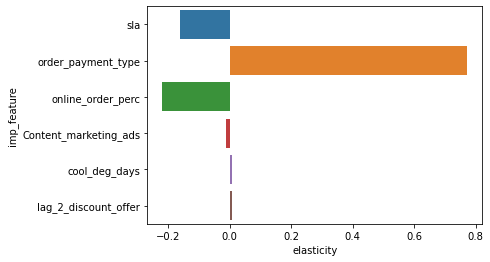

,imp_feature,coef,elasticity
0,sla,-0.081,-0.162
1,order_payment_type,0.806,0.771
2,online_order_perc,-0.394,-0.219
3,Content_marketing_ads,-0.023,-0.012
4,cool_deg_days,0.007,0.007
5,lag_2_discount_offer,0.003,0.008


In [148]:
elasticity(dlmm1,home_train_dlm)

Text(0, 0.5, 'y_pred')

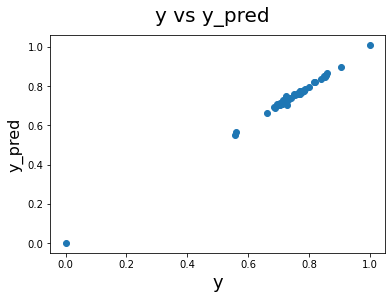

In [149]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

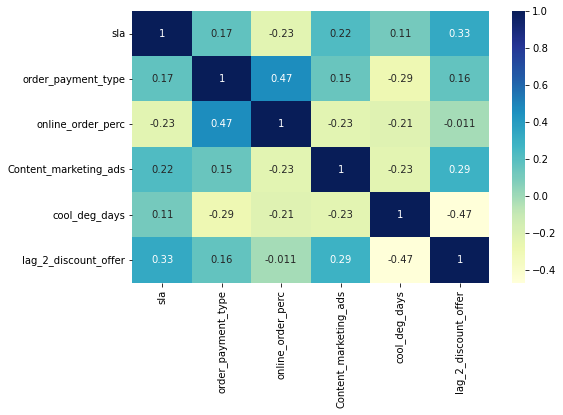

In [150]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

<Figure size 1200x400 with 0 Axes>

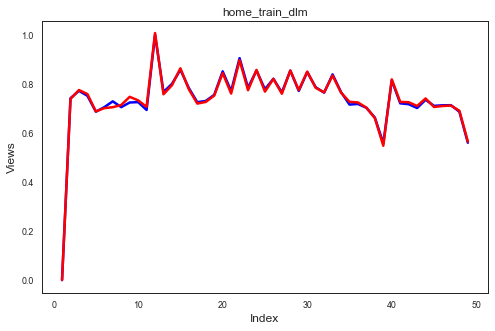

In [159]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(12, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster


plt.figure(figsize=(8,5))
c = [i for i in range(1,50,1)]
plt.plot(c, y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="red",  linewidth=2.5, linestyle="-")
plt.title('home_train_dlm', fontsize=12)
plt.xlabel('Index', fontsize=12)                               # X-label
plt.ylabel('Views', fontsize=12)                               # Y-label

# display the plot
plt.show()